Load the edgelist data to be visulized using mcl clustering

In [3]:
ff= pd.read_csv('mc.csv')
ff.shape

(4637, 4)

In [4]:
ff.columns

Index(['Unnamed: 0', 'source', 'target', 'weight'], dtype='object')

In [ ]:
!pip install markov_clustering

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import markov_clustering as mcl

In [6]:
ff.head()

,Unnamed: 0,source,target,weight
0,2211,ENSP00000254066,ENSP00000441691,395
1,2212,ENSP00000254066,ENSP00000327801,350
2,2223,ENSP00000254066,ENSP00000221930,315
3,2229,ENSP00000254066,ENSP00000479667,320
4,2232,ENSP00000254066,ENSP00000356840,510


In [7]:
B= nx.from_pandas_edgelist(ff, 'source', 'target')
matrix = nx.to_numpy_matrix(B)

In [ ]:
B= nx.from_pandas_edgelist(ff, 'source', 'target')
matrix = nx.to_numpy_matrix(B)
for inflation in [i / 10 for i in range(20, 26)]:
    result = mcl.run_mcl(matrix, inflation=inflation)
    clusters = mcl.get_clusters(result)
    result= np.asmatrix(result)
    Q = mcl.modularity(matrix=result, clusters=clusters)
    print("inflation:", inflation, "modularity:", Q)


In [8]:
# Load network data

degree_dict = dict(B.degree(B.nodes()))
nx.set_node_attributes(B, degree_dict, 'degree')
betweenness = nx.betweenness_centrality(B)
nx.set_node_attributes(B, betweenness, 'betweenness')
eigenvector = nx.eigenvector_centrality(B, max_iter= 5000)
nx.set_node_attributes(B, eigenvector, 'eigenvector')
closeness = nx.closeness_centrality(B)
nx.set_node_attributes(B, closeness, 'closeness')
clustering = pd.Series(nx.clustering(B))
nx.set_node_attributes(B, clustering, 'clustering')
eccentricity = pd.Series(nx.eccentricity(B))
nx.set_node_attributes(B, eccentricity, 'eccentricity')


bb = nx.edge_betweenness_centrality(B, normalized=False)
nx.set_edge_attributes(B, bb, 'betweenness')
ll= nx.preferential_attachment(B, B.edges())
oo= [x for x in ll]
oo= dict([(x[0:2], x[2]) for x in oo])
nx.set_edge_attributes(B, oo, 'attachment')
jj= nx.jaccard_coefficient(B, B.edges())
jj= [x for x in jj]
jj= dict([(x[0:2], x[2]) for x in jj])
nx.set_edge_attributes(B, jj, 'jc')
aa = nx.resource_allocation_index(B, B.edges())                                          
aa= [x for x in aa]
aa= dict([(x[0:2], x[2]) for x in aa])
nx.set_edge_attributes(B, aa, 'resource')
hh= list(B.edges())
uu= list(map(lambda city: len(list(nx.common_neighbors(B, city[0], city[1]))), hh))
cc= dict([(hh[i], uu[i]) for i in range(len(uu))])
nx.set_edge_attributes(B, cc, 'common_neighbor')


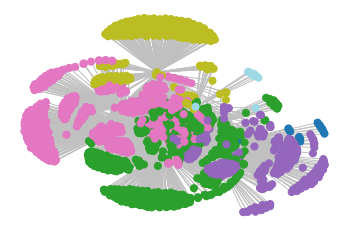

In [9]:
result = mcl.run_mcl(matrix, inflation=2.4)
clusters = mcl.get_clusters(result)
mcl.draw_graph(matrix, clusters, node_size=50, with_labels=False, edge_color="silver")

In [10]:
len(clusters)

6

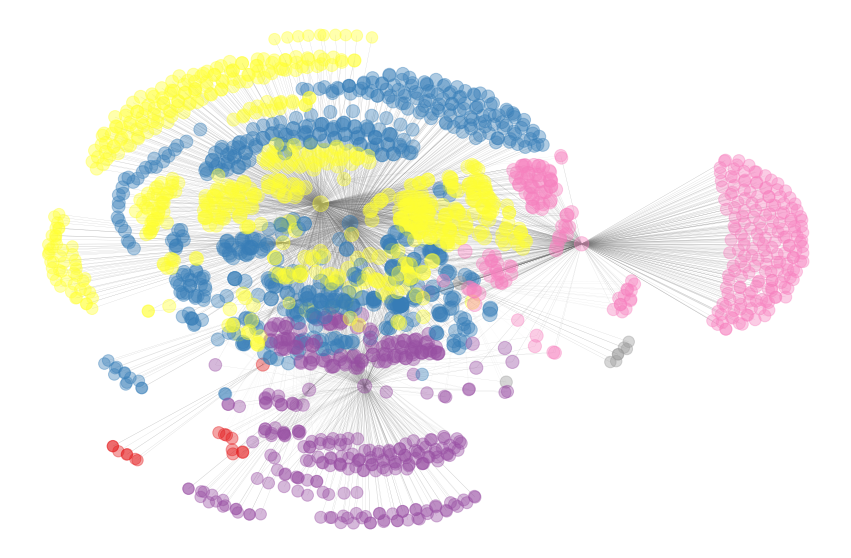

<Figure size 432x288 with 0 Axes>

In [17]:
f, ax= plt.subplots(figsize= (15, 10))
pos = nx.spring_layout(B, k=0.5)
#node_color= [i[1] for i in degree_dict.items()]
node_size= [500*nx.get_node_attributes(B, "closeness")[v] for v in B]
edge_width= [0.0001*(B[u][v]['betweenness']) for u,v in B.edges()]
#greater= [x for x in G.edges(data= True) if x[2]['attachment'] > 150]

greater= [x for x in B.edges(data= True) if x[2]['attachment'] > 3000]
mcl.draw_graph(matrix, clusters,  node_size=node_size, with_labels=False, alpha= 0.4, width= edge_width, edge_color= ".4", ax= ax, cmap=plt.get_cmap('Set1'))
#nx.draw_networkx_edges(B, pos= pos, edgelist= greater, edge_color= "r", alpha= 0.4, ax= ax)
#nx.draw_networkx_labels(B, pos= pos, labels= {'JUN_HUMAN': "B", 'TGFR1_HUMAN': "B"}, font_size= 60, ax= ax)
plt.savefig('new.png')

Function to create a dataframe having index of cluster number and column is node belonging to the corresponding cluster

In [11]:
def multiple():
    dfs= []
    cc= pd.DataFrame(B.nodes())
    for x in clusters:
        pp= cc.loc[x, :]
        dfs.append(pp)
    return dfs

In [12]:
new= multiple()
yy= pd.concat(new, keys= list(range(len(clusters))))

In [13]:
yy

0
0 0     ENSP00000254066
  1     ENSP00000441691
  7     ENSP00000292614
  38    ENSP00000376272
  46    ENSP00000384517
...                 ...
5 1877  ENSP00000368169
  1878  ENSP00000469689
  1879  ENSP00000358918
  1880  ENSP00000300659
  1881  ENSP00000303634

[1900 rows x 1 columns]

In [20]:
yy.shape

(1900, 1)

In [14]:
yy= yy.reset_index()

In [15]:
yy.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [16]:
clusters[5]

(1794, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881)

In [17]:
for i in range(len(clusters)):
    if len(clusters[i]) == 9:
        print(clusters[i])

(1794, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881)


In [18]:
yy.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [19]:
yy_1= yy.loc[yy['level_0']== 0, :]
yy_2= yy.loc[yy['level_0']== 1, :]
yy_3= yy.loc[yy['level_0']== 2, :]
yy_4= yy.loc[yy['level_0']== 3, :]
yy_5= yy.loc[yy['level_0']== 4, :]
yy_6= yy.loc[yy['level_0']== 5, :]


function to create edgelist from the node series

In [20]:
def edgelist(df):
    pf= df.rename({0: 'target'}, axis= 1)
    c1= ff[['target']].merge(pf['target'], how= 'inner', on= 'target')
    pf.rename({'target': 'source'}, axis= 1, inplace= True)
    c11= ff[['source']].merge(pf['source'], how= 'inner', on= 'source')
    y1= c11.merge(c1, how= 'outer', left_index= True, right_index= True).dropna()
    return y1

In [21]:
len(yy_2)

608

In [22]:
len(yy_6)

9

In [23]:
y1= edgelist(yy_1)
y2= edgelist(yy_2)
y3= edgelist(yy_3)
y4= edgelist(yy_4)
y5= edgelist(yy_5)
y6= edgelist(yy_6)


In [24]:
y6.source.value_counts()

ENSP00000324806    9
Name: source, dtype: int64

In [26]:
y1.set_index('target', inplace= True)
y2.set_index('target', inplace= True)
y3.set_index('target', inplace= True)
y4.set_index('target', inplace= True)
y5.set_index('target', inplace= True)
y6.set_index('target', inplace= True)

In [70]:
yy_1

,level_0,level_1,0
0,0,0,ENSP00000254066
1,0,1,ENSP00000441691
2,0,7,ENSP00000292614
3,0,38,ENSP00000376272
4,0,46,ENSP00000384517
5,0,49,ENSP00000297109
6,0,53,ENSP00000301788
7,0,55,ENSP00000296504
8,0,60,ENSP00000350333
9,0,62,ENSP00000272645


In [29]:
import time
from operator import itemgetter

In [30]:
time.time()

1589016822.5801523

In [44]:
%matplotlib notebook

Plot showing different clusters along with the node having highest degree

<IPython.core.display.Javascript object>


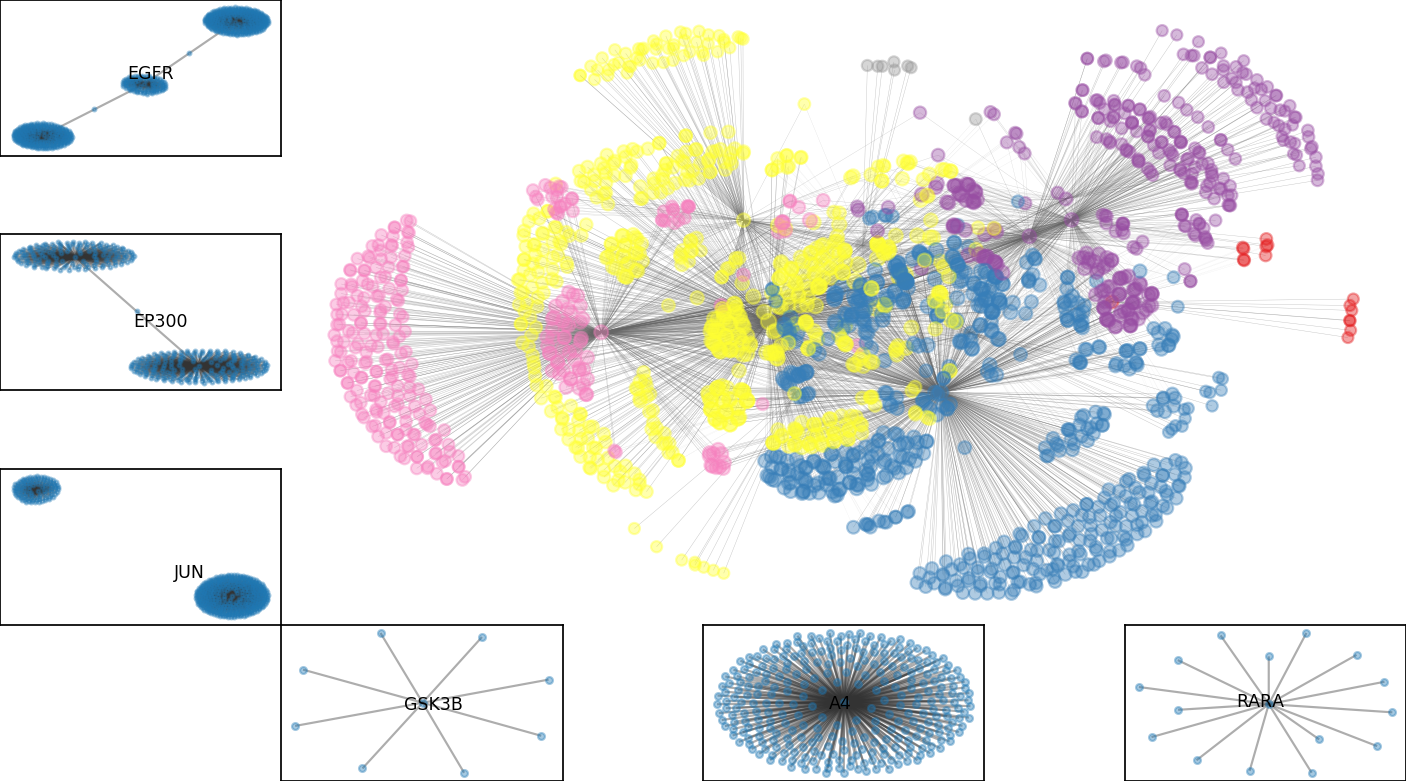

In [69]:
fig= plt.figure(figsize= (9, 5))
ax1= fig.add_axes([0.2, 0.2, 0.8, 0.8])



#ax3= fig.add_axes([0.8, 0.2, 0.2, 0.2])
#ax4= fig.add_axes([0.5, 0.8, 0.2, 0.2])
#ax5= fig.add_axes([0.8, 0.8, 0.2, 0.2])
#ax6= fig.add_axes([0.8, 0.5, 0.2, 0.2])
#ax7= fig.add_axes([0.2, 0.2, 0.2, 0.2])
pos = nx.spring_layout(B, k=0.5)
#node_color= [i[1] for i in degree_dict.items()]
node_size= [100*nx.get_node_attributes(B, "closeness")[v] for v in B]
edge_width= [0.0001*(B[u][v]['betweenness']) for u,v in B.edges()]
#greater= [x for x in G.edges(data= True) if x[2]['attachment'] > 150]

greater= [x for x in B.edges(data= True) if x[2]['attachment'] > 3000]
mcl.draw_graph(matrix, clusters,  node_size=node_size, with_labels=False, alpha= 0.4, width= edge_width, edge_color= ".4", ax= ax1, cmap=plt.get_cmap('Set1'))
#nx.draw_networkx_edges(B, pos= pos, edgelist= greater, edge_color= "r", alpha= 0.4, ax= ax)
#nx.draw_networkx_labels(B, pos= pos, labels= {'JUN_HUMAN': "B", 'TGFR1_HUMAN': "B"}, font_size= 60, ax= ax)
#plot of individual figure


def plot1(df, ax, pos= pos):
    graph= nx.from_pandas_edgelist(df, 'source', 'target')
    
    Q= dict(graph.degree())
    qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
    nx.draw_networkx(graph, node_size=10,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax)
    nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "B"}, font_size= 8)
    
    
ax2= fig.add_axes([0.8, 0, 0.2, 0.2])
graph= nx.from_pandas_edgelist(y1, 'source', 'target')
  
Q= dict(graph.degree())
qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
nx.draw_networkx(graph, node_size=10,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax2)
nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "RARA"}, font_size= 8)



ax3= fig.add_axes([0, 0.2, 0.2, 0.2])
graph= nx.from_pandas_edgelist(y2, 'source', 'target')
  
Q= dict(graph.degree())
qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
nx.draw_networkx(graph, node_size=3,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax3)
nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "JUN"}, font_size= 8)


ax4= fig.add_axes([0, 0.5, 0.2, 0.2])
graph= nx.from_pandas_edgelist(y3, 'source', 'target')
  
Q= dict(graph.degree())
qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
nx.draw_networkx(graph, node_size=3,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax4)
nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "EP300"}, font_size= 8)


ax5= fig.add_axes([0, 0.8, 0.2, 0.2])
graph= nx.from_pandas_edgelist(y4, 'source', 'target')
  
Q= dict(graph.degree())
qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
nx.draw_networkx(graph, node_size=3,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax5)
nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "EGFR"}, font_size= 8)

ax6= fig.add_axes([0.5, 0, 0.2, 0.2])
graph= nx.from_pandas_edgelist(y5, 'source', 'target')
  
Q= dict(graph.degree())
qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
nx.draw_networkx(graph, node_size=10,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax6)
nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "A4"}, font_size= 8)


ax7= fig.add_axes([0.2, 0, 0.2, 0.2])
graph= nx.from_pandas_edgelist(y6, 'source', 'target')
  
Q= dict(graph.degree())
qq= sorted(Q.items(), key= itemgetter(1), reverse= True)[0]
nx.draw_networkx(graph, node_size=10,edge_color="#333333", alpha=0.4, with_labels=False, ax= ax7)
nx.draw_networkx_labels(graph, pos= pos, labels= {qq[0]: "GSK3B"}, font_size= 8)



fig.savefig('whole_plot.png');




In [67]:
y6.source.value_counts()

ENSP00000324806    9
Name: source, dtype: int64

In [37]:
def plot(df, ax):
    B= nx.from_pandas_edgelist(df, 'source', 'target')
    
    m= dict(B.degree())
    r= sorted(m.items(), key= itemgetter(1), reverse= True)[0]
    pos = nx.spring_layout(B, k=0.2)
    nx.draw_networkx(B, pos=pos, node_size=20,
    edge_color="#333333", alpha=0.4, with_labels=False, ax= ax)
    nx.draw_networkx_labels(B, pos= pos, labels= {r[0]: "B"}, font_size= 20, ax= ax)
    